 # Preprocessing of Audio Files
 
After the audiofiles were downloaded, I used the LibROSA library to process the audio files.

In [2]:
import os
import sys
import configparser
import glob
import pandas as pd
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.model_selection import train_test_split
import IPython.display as ipd
from tqdm import tqdm

import config

## An Overview of Spectrograms


I have loaded a 30 second snippet of the song "Electricity" by Silk City and Dua Lipa for demonstration purposes. Note that the audio player below can only be accessed via Jupyter Notebook and is not supported by the Github frontend. Alternatively, [you can listen to the clip by clicking this link](https://drive.google.com/file/d/1tLcNlQZduFPt8oA_gEdEcsI4ii59QxIK/view?usp=sharing). 

In [3]:
y, sr = librosa.load("../1_Data_Collection/Downloads/Established_Artists_Songs/5N4erncE7kuUccm7zEmwzk.mp3")

In [4]:
ipd.Audio(y, rate=sr)

Spectrograms are plots that show how frequency and amplitude change over time for a given audio signal. Spectrograms are ideal for audio analysis since they provide accurate representations of audio signals and are easy to interpret. 

Spectrograms are created by applying a fast fourier transform to the waveform of an audio signal. Below is a pressure-time plot, or waveform, of the acoustic version of "Electricity" by Silk City. This plot is showing us how the amplitude of the sounds in the song change over time.


![Waveform of Electricity by Silk City](../Images/Electricity.png)


The fast fourier transform splits up the pressure-time data shown in a waveform into many frames of equal length and translates each frame into arrays that shows us the range of amplitudes against a frequency at a specific time. A spectrogram displays all of these frames side-by-side in a plot where time is represented by the x-axis, frequency by the y-axis, and amplitude by a set of colors on a spectrum. 

![Spectrogram of Electricity by Silk City](../Images/Electricity_Spec.png)

Spectrograms also allow us to see the timbre of an audio signal, giving us a more complicated visual representation of a song than possible with a waveform. Timbre is the quality of a sound that allows us to distinguish between sounds despite loudness or pitch (some refer to this as the "tone color" of a sound). Timbre can be refered to in terms of "brightness" or "darkness" of a sound. In the song "Electricity," you'll see that at the height of the chorus (0:07-0:23) the timbre is at is brightest, especially when compared to the end of the clip, when the song transitions into the bridge. 

![Spectrogram of Electricity by Silk City](../Images/Electricity_Spec_annot.png)

Below is a spectrogram of the [acoustic version of the same song](https://drive.google.com/file/d/18ctCKBbb8WazCAZ5o_VISROsXaq-LRkD/view?usp=sharing). You can see how with a spectrogram, you can get a some sense of the differences and similarities betweens songs, even if just on a stylistic level. 

![Spectrogram of Electricity (Acoustic) by Silk City](../Images/Electricity_Acoustic_Spec.png)


In [5]:
#Audio of Electricity (Acoustic) by Silk City
y2, sr2 = librosa.load("../1_Data_Collection/Downloads/Established_Artists_Songs/79QsAQKkk3hlOC6yV1uKdg.mp3") 
ipd.Audio(y2, rate=sr2)

This brings up a limitation of spectrograms in the context of musical analysis – they are content agnostic. Songs with similar timbres can convey different moods. Compare the spectrogram above for the acoustic version of "Electricity" to that of Adele's ["Someone Like You."](https://drive.google.com/file/d/1ANsOJsfyRalhvTqQW98qYcZFZeSS7TPz/view?usp=sharing)

![Spectrogram of Someone Like You by Adele](../Images/Someone_Like_You_Spec.png)

In [6]:
#Audio of Someone Like You by Adele
y3, sr3 = librosa.load("../1_Data_Collection/Downloads/Established_Artists_Songs/4kflIGfjdZJW4ot2ioixTB.mp3")
ipd.Audio(y3, rate=sr3)

Also compare Mark Ronson and Miley Cyrus' ["Nothing Breaks Like A Heart,"](https://drive.google.com/file/d/1PJkIAWpURfmBLotNI3n8grPGy5VJLu_q/view?usp=sharing) a song described a ["sad banger"](https://pitchfork.com/news/listen-to-mark-ronson-and-miley-cyrus-new-song-nothing-breaks-like-a-heart/) by the creator himself, and "Electricity," a more upbeat house-hop track with contributions from the same producer. 

![Spectrogram of Nothing Breaks Like a Heart by Miley Cyrus](../Images/Nothing_Breaks_Like_A_Heart.png)

![Spectrogram of Electricity by Silk City](../Images/Electricity_Spec.png)

In [7]:
#Audio of Nothing Breaks Like a Heart by Miley Cyrus and Mark Ronson
y4, sr4 = librosa.load("../1_Data_Collection/Downloads/Established_Artists_Songs/27rdGxbavYJeBphck5MZAF.mp3")
ipd.Audio(y4, rate=sr4)

## Using Cosine Similarity to Compare Audio Signals

Spectrograms are simply a visualization of the numerical relationship between the three dimensions of audio they feature. Each point on the spectrogram is represented by a number in an array, which means that, in theory, we do not need the images themselves in order to make comparisons betweeen audio signals. Below is an example of one of these arrays.

In [8]:
#Returning the array for Electricity by Silk City
S = librosa.feature.melspectrogram(y, sr, n_mels=128) 
log_S = librosa.power_to_db(S, ref=np.max)
log_S

array([[-30.67307621, -30.50163287, -30.55519981, ..., -15.36390736,
        -16.7629234 , -26.2243217 ],
       [-24.80613929, -14.4072633 , -12.03528698, ...,  -9.01927008,
        -12.79395783, -26.33264173],
       [-19.66788093,  -9.04338537,  -6.76091069, ..., -16.51043209,
        -16.93264907, -27.51955827],
       ...,
       [-53.88060711, -51.64700764, -53.77801585, ..., -59.90001482,
        -57.8706274 , -66.05512648],
       [-56.66220435, -55.06334651, -57.59226031, ..., -69.57308741,
        -66.01379605, -71.82986119],
       [-69.52373037, -66.28324581, -69.02400945, ..., -80.        ,
        -80.        , -80.        ]])

In [16]:
S

array([[1.53072777e-01, 1.24098092e-01, 8.30791582e-02, ...,
        2.26692609e-01, 1.04921589e-01, 1.99335095e-02],
       [1.01697086e+00, 3.65125674e-01, 2.65205090e-01, ...,
        1.84668374e+00, 1.60247586e+00, 1.85953090e-01],
       [2.30094890e+00, 1.07780921e+00, 4.46038425e-01, ...,
        2.50352786e+01, 9.46591797e+00, 4.86140844e-01],
       ...,
       [2.04842683e-03, 7.69564124e-04, 1.05721332e-03, ...,
        1.17194626e-04, 3.23533322e-04, 1.15432013e-04],
       [2.47221043e-03, 7.04857090e-04, 2.09144813e-04, ...,
        4.68943890e-05, 1.60864453e-04, 5.56947989e-05],
       [2.10256650e-03, 5.40313000e-04, 8.51053831e-06, ...,
        3.02423793e-06, 1.14340173e-05, 4.00795730e-06]])

In [9]:
log_S.shape

(128, 1294)

One of the ways I though of doing this was by employing [cosine similarity](https://www.machinelearningplus.com/nlp/cosine-similarity/), a metric that measures the difference between two non-zero vectors by calculating the cosine of the angle between them. The image below from the blog [Terra Incognita by Christian S. Perone](http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/) gives a good overview of how the concept works: 

![image](http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png)

&nbsp;

We will compare the array for "Electricity" by Silk City (above) to that of the acoustic version using cosine similarity:

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

S2 = librosa.feature.melspectrogram(y2, sr2, n_mels=128)
log_S2 = librosa.power_to_db(S2, ref=np.max)

cosine_similarity(X=log_S.reshape(1, -1), #since cosine similarity measures the distance between two vectors, the arrays must be reshaped so that they are one-dimensional 
                  Y=log_S2.reshape(1, -1))

array([[0.95862753]])

In [17]:
cosine_similarity(X=S.reshape(1, -1), #since cosine similarity measures the distance between two vectors, the arrays must be reshaped so that they are one-dimensional 
                  Y=S2.reshape(1, -1))

array([[0.03695103]])

In [7]:
log_S.shape

(128, 1294)

&nbsp;

Now we will compare the original version of "Electricity" to "Nothing Breaks Like a Heart" by Mark Ronson and Miley Cyrus:

In [15]:
S4 = librosa.feature.melspectrogram(y4, sr4, n_mels=128)
log_S4 = librosa.power_to_db(S4, ref=np.max)

cosine_similarity(X=log_S.reshape(1, -1), 
                  Y=log_S4.reshape(1, -1))

array([[0.96905828]])

In [18]:
cosine_similarity(X=S.reshape(1, -1), 
                  Y=S4.reshape(1, -1))

array([[0.02123677]])

&nbsp;

At first glance, it may seem that there is no real difference between the two outcomes above – after all, the two scores above are off by just .01 or one percent. However, when you consider the fact that we are comparing the same type of audio (music) it makes sense that the signals are mostly alike. The small differences between them are sufficient enough to make meaningful comparisons using cosine similarity, even if it comes down to the third or fourth significant digit. 

&nbsp;

## Generating Arrays for Audio Signals (Songs)

In [8]:
emerging_arrays = {}
for song in tqdm(os.listdir("../1_Data_Collection/Downloads/Emerging_Artists_Songs")):
    try:
        y, sr = librosa.load("/Users/jonruiz/Capstone/downloads/emerging/" + song)
        emerging_arrays[song[:-4]] = librosa.power_to_db(librosa.feature.melspectrogram(y, sr, n_mels=128), ref=np.max)
    except:
        pass

100%|██████████| 4407/4407 [1:43:20<00:00,  1.58s/it]


In [10]:
import hickle as hkl
hkl.dump(emerging_arrays,'emerging_arrays.hkl')
len(emerging_arrays)

4407

In [73]:
df_emerging_arrays = pd.DataFrame(emerging_arrays.items(), columns=["track_id", "array"])

In [12]:
established_arrays = {}
for song in tqdm(os.listdir("../1_Data_Collection/Downloads/Established_Artists_Songs")):
    try:
        y, sr = librosa.load("/Users/jonruiz/Capstone/downloads/established/" + song)
        established_arrays[song[:-4]] = librosa.power_to_db(librosa.feature.melspectrogram(y, sr, n_mels=128), ref=np.max).reshape(-1)
    except:
        pass
    

100%|██████████| 4099/4099 [1:34:52<00:00,  1.32s/it]


In [13]:
df_established_arrays = pd.DataFrame(established_arrays.items(), columns=["track_id", "array"])

In [14]:
hkl.dump(established_arrays,'established_arrays.hkl')

In [93]:
df_emerging_arrays["artist_type"] = 0

In [41]:
df_established_arrays["artist_type"] = 1

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
np.save("sample_matrix.npy", df_emerging_arrays["array"].tolist())

In [43]:
df = pd.concat([df_established_arrays, df_emerging_arrays])
df = df.reset_index().drop(columns="index")

In [44]:
df.head()

track_id                                              array  \
0  0FZ4Dmg8jJJAPJnvBIzD9z  [-1.7511967643766013, -2.2230427405553, -1.973...   
1  5ri4b7YQp2PWn8tl3MRYgE  [-17.71829981274732, -13.576755507234935, -12....   
2  4D8uIY6Wzj7dJDaw0dW0UF  [-28.748628475617704, -29.9513744070656, -34.2...   
3  3fbnbn6A5O5RNb08tlUEgd  [-23.727272900344378, -20.87729407477605, -21....   
4  139RwLyp7r8F9ojvhGF5lC  [-38.59122937250135, -40.582152618045036, -43....   

   artist_type  
0            1  
1            1  
2            1  
3            1  
4            1

In [104]:
df.shape

(8505, 3)

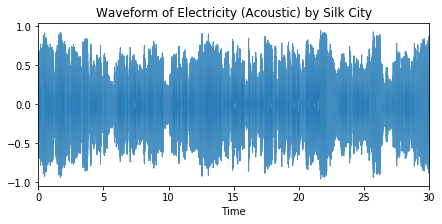

In [7]:
#code for all of the plots displayed above
plt.figure(figsize = (7,3))
display.waveplot(y, sr=sr, alpha = 0.8);
plt.title("Waveform of Electricity (Acoustic) by Silk City");
plt.savefig('../Images/Electricity_Acoustic.png', transparent=True)

plt.figure(figsize = (7,3))
S = librosa.feature.melspectrogram(y, sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-spectrogram of Electricity by Silk City");
plt.savefig('../Images/Electricity_Acoustic_Spec.png', transparent=True)

plt.figure(figsize = (7,3))
display.waveplot(y2, sr=sr2, alpha = 0.8);
plt.title("Waveform of Electricity (Acoustic) by Silk City");
plt.savefig('../Images/Electricity.png', transparent=True)

plt.figure(figsize = (7,3))
S2 = librosa.feature.melspectrogram(y2, sr2, n_mels=128)
log_S2 = librosa.power_to_db(S2, ref=np.max)
librosa.display.specshow(log_S2, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-spectrogram of Electricity (Acoustic) by Silk City");
plt.savefig('../Images/Electricity_Spec.png', transparent=True)

plt.figure(figsize = (7,3))
display.waveplot(y3, sr=sr3, alpha = 0.8);
plt.title("Waveform of Someone Like You by Adele");
plt.savefig('../Images/Someone_Like_You.png', transparent=True)

plt.figure(figsize = (7,3))
S3 = librosa.feature.melspectrogram(y3, sr3, n_mels=128)
log_S3 = librosa.power_to_db(S3, ref=np.max)
librosa.display.specshow(log_S3, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-spectrogram of Someone Like You by Adele");
plt.savefig('../Images/Someone_Like_You_Spec.png', transparent=True)

plt.figure(figsize = (7,3))
display.waveplot(y4, sr=sr4, alpha = 0.8);
plt.title("Waveform of Nothing Breaks Like A Heart by Miley Cyrus and Mark Ronson");
plt.savefig('../Images/Nothing_Breaks_Like_A_Heart.png', transparent=True)

plt.figure(figsize = (7,3))
S4 = librosa.feature.melspectrogram(y4, sr4, n_mels=128)
log_S4 = librosa.power_to_db(S4, ref=np.max)
librosa.display.specshow(log_S4, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-spectrogram of Nothing Breaks Like A Heart by Miley Cyrus and Mark Ronson");
plt.savefig('../Images/Nothing_Breaks_Like_A_Heart.png', transparent=True);